In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout,BatchNormalization
from keras.datasets import cifar10

In [6]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [7]:
train_images.shape

(50000, 32, 32, 3)

In [8]:
test_images.shape

(10000, 32, 32, 3)

In [9]:
labels= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

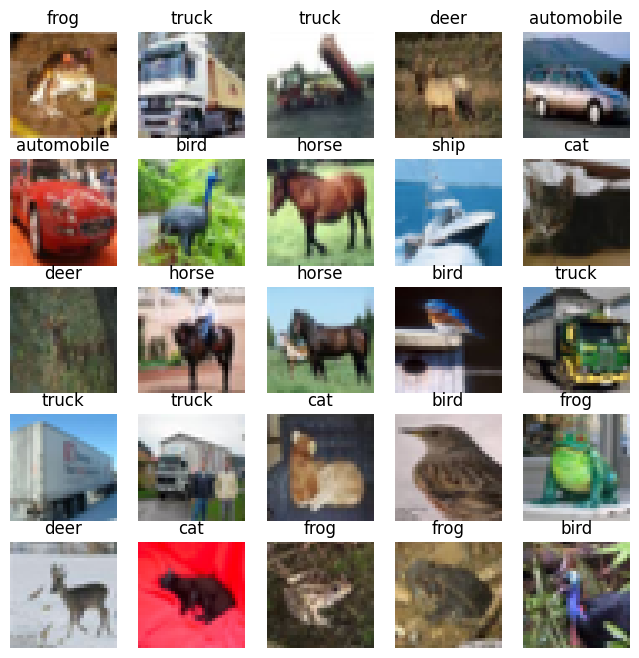

In [10]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title(labels[train_labels[i][0]])
    plt.imshow(train_images[i])
    plt.axis('off')

In [11]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images,test_labels))

In [12]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [13]:
test_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [14]:
def process_image(image,label):
  image = tf.image.per_image_standardization(image)
  image = tf.image.resize(image,(64,64))
  return image,label

In [15]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 50000
Test size: 10000


In [16]:
train_ds = (train_ds.map(process_image).shuffle(buffer_size=train_ds_size).batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds.map(process_image).shuffle(buffer_size=test_ds_size).batch(batch_size=32, drop_remainder=True))

In [17]:
model = Sequential([
  Conv2D(filters=128,kernel_size=(11,11),input_shape=(64,64,3),strides=(4,4),activation='relu'),
  BatchNormalization(),
  MaxPool2D(pool_size=(2,2)),
  Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation='relu',padding='same'),
  BatchNormalization(),
  MaxPool2D(pool_size=(3,3)),
  Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation='relu',padding='same'),
  BatchNormalization(),
  Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation='relu',padding='same'),
  BatchNormalization(),
  Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation='relu',padding='same'),
  BatchNormalization(),
  MaxPool2D(pool_size=(2,2)),
  Flatten(),
  Dense(1024,activation='relu'),
  Dropout(0.5),
  Dense(1024,activation='relu'),
  Dropout(0.5),
  Dense(10,activation='softmax')])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (Batch  (None, 14, 14, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 128)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 256)         1024      
 chNormalization)                                                
                                                        

In [19]:
model.compile(optimizer=tf.optimizers.SGD(learning_rate = 0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
1562/1562 [==============================] - 37s 16ms/step - loss: 1.9558 - accuracy: 0.3187 - val_loss: 1.4307 - val_accuracy: 0.4904
Epoch 2/10
1562/1562 [==============================] - 30s 16ms/step - loss: 1.5127 - accuracy: 0.4618 - val_loss: 1.2594 - val_accuracy: 0.5494
Epoch 3/10
1562/1562 [==============================] - 30s 16ms/step - loss: 1.3268 - accuracy: 0.5318 - val_loss: 1.1580 - val_accuracy: 0.5910
Epoch 4/10
1562/1562 [==============================] - 27s 15ms/step - loss: 1.1902 - accuracy: 0.5823 - val_loss: 1.0796 - val_accuracy: 0.6156
Epoch 5/10
1562/1562 [==============================] - 29s 16ms/step - loss: 1.0833 - accuracy: 0.6229 - val_loss: 1.0435 - val_accuracy: 0.6372
Epoch 6/10
1562/1562 [==============================] - 28s 16ms/step - loss: 0.9880 - accuracy: 0.6570 - val_loss: 0.9854 - val_accuracy: 0.6619
Epoch 7/10
1562/1562 [==============================] - 27s 15ms/step - loss: 0.9089 - accuracy: 0.6853 - val_loss: 0.9670 -

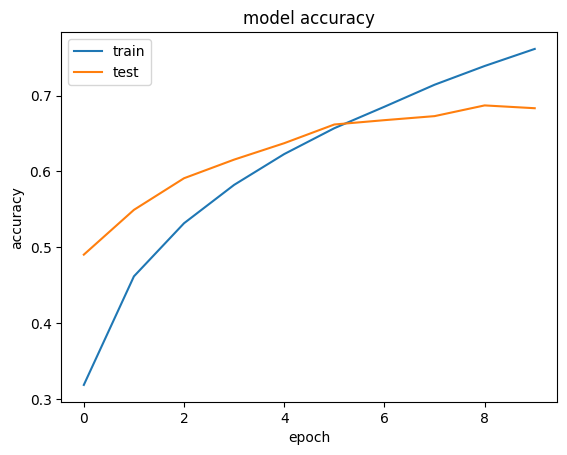

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()